In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import pandas as pd

Import the table obtained in the access phase

In [9]:
krannet_df = pd.read_json('../cache/network_analysis_data.json')
#krannet_df.sort_values(by=['meeting_id'], inplace=True)

# remove some people
krannet_df = krannet_df[krannet_df.interventions > 2]

display(krannet_df.tail(), len(krannet_df))


,year,speaker_id,meeting_id,speaker_name,interventions
179,1861,161,8,Abg. Dr. v. Wurzbach,6
180,1861,158,8,Abg. v. Strahl,6
181,1861,84,5,Präsident,29
182,1861,47,3,Abg. Anton Graf Auersperg,4
184,1861,52,3,Abg. Dr. Bleiweis,5


48

Plot social network of people giving a pitch in the same meeting

In [10]:
def add_edges_for_meeting(meeting_id, graph, dataframe):

    # Generate all possible combinations of pairs within a list
    combinations_list = list(combinations(dataframe[dataframe.meeting_id == meeting_id].speaker_name, 2))
    
    # Add Edges
    for s1, s2 in combinations_list:
        graph.add_edge(s1, s2)


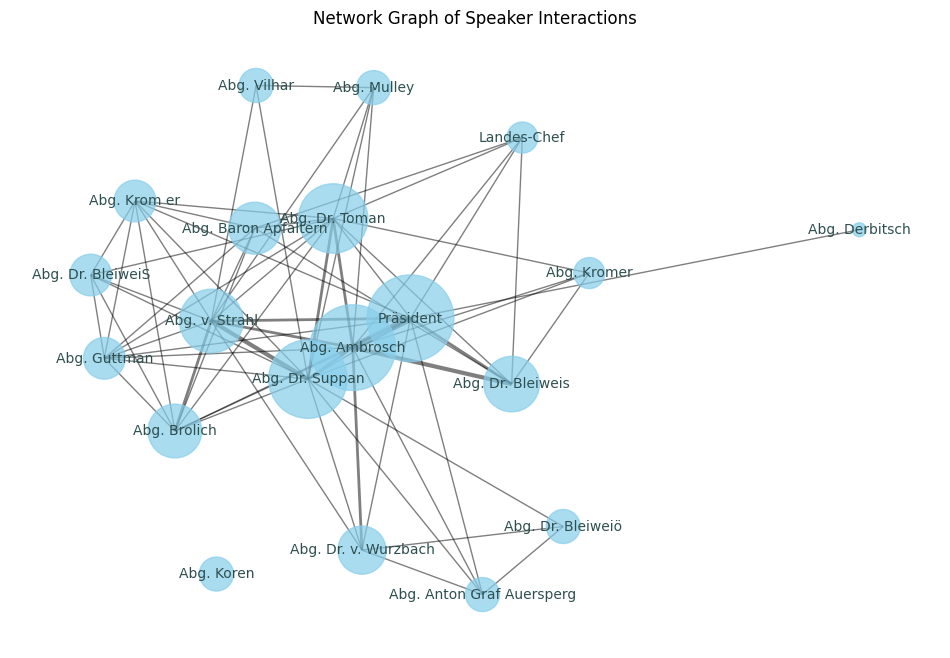

In [11]:
G = nx.Graph()

# Create counters for nodes and edges
node_counter = Counter()
edge_counter = Counter()

for m in set(krannet_df.meeting_id):
    combinations_list = list(combinations(krannet_df[krannet_df.meeting_id == m].speaker_name, 2))
    #print(combinations_list[:5])
    
    # Add Edges
    for s1, s2 in combinations_list:
        G.add_edge(s1, s2)
        node_counter[s1] += 1
        node_counter[s2] += 1
        edge_counter[(s1, s2)] += 1


# Normalize node sizes for better visualization
node_sizes = [node_counter[node] * 100 for node in G.nodes()]  # Adjust scaling factor as needed

# Normalize edge widths for better visualization
edge_widths = [edge_counter[edge] for edge in G.edges()]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Use a layout for the graph
pos = nx.spring_layout(G, seed=42)  # spring layout with a fixed seed for reproducibility

# Draw nodes and edges with attributes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='darkslategray')

# Title and display options
plt.title('Network Graph of Speaker Interactions')
plt.axis('off')  # Hide the axes
plt.show();

In [12]:
# calculate degree centrality and betweenness for nx
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# define the node labels
nodes = list(set(krannet_df.speaker_name))
print(nodes)

# retrieve degree centrality for each node
dc_calculations = []
bc_calculations = []

for node in nodes:
    dc_calculations += [degree_centrality[node]]
    bc_calculations += [betweenness_centrality[node]]

# create a centrality data df to store values
centrality_data = pd.DataFrame()

# populate the df with the nodes and their centrality values
centrality_data["Node"] = nodes
centrality_data["Degree-Centrality"] = dc_calculations
centrality_data["Betweenness-Centrality"] = bc_calculations

print(centrality_data)

['Landes-Chef', 'Präsident', 'Abg. Baron A Psaltern', 'Abg. Dr. Bleiweiö', 'Abg. Dr. BleiweiS', 'Abg. v. Strahl', 'Abg. Freih. v. Apfaltern', 'Abg. Koren', 'Abg. Dr. Toman', 'Abg. Dr. Recher', 'Abg. Mulley', 'Abg. Dr. Suppan', 'Abg. Krom er', 'Abg. Ambro sch', 'Abg. Brolich', 'Abg. Kromer', 'Abg. Baron Apfaltern', 'Abg. Guttman', 'Abg. Dr. Bleiweis', 'Abg. Vilhar', 'Abg. Dr. v. Wurzbach', 'Abg. Ambrosch', 'Abg. Derbitsch', 'Abg. Dr. Tom an', 'Abg. Dr. Blei weis', 'Abg. Anton Graf Auersperg', 'Abg. v. Wurzbach']
                         Node  Degree-Centrality  Betweenness-Centrality
0                 Landes-Chef           0.346154                0.000000
1                   Präsident           1.000000                0.073420
2       Abg. Baron A Psaltern           0.346154                0.000000
3           Abg. Dr. Bleiweiö           0.730769                0.015149
4           Abg. Dr. BleiweiS           0.461538                0.000000
5              Abg. v. Strahl           0.730